From Ralph Henrickson, a classic problem of probability manipulation:

You have two buckets and 100 ping-pong balls, 50 of which are red and 50 of which are blue. You get to arrange the balls into the two buckets however you’d like, but each bucket needs at least one ball. Your friend will blindly choose one of the two buckets and then select a ball at random from the chosen bucket.

How can you arrange the balls to maximize the probability that your friend chooses a red ball? What probability of success do you achieve?

Extra credit: What probability of success do you get with 25 balls of each color? 200 balls of each color?

Solution by Mark Mace

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random

In [14]:
# FOR A GIVEN BUCKET, PICK A BALL #
def draw(bucket):
    pick=random.randint(0,len(bucket)-1)
    return bucket[pick]


In [32]:
# FILL BUCKETS WITH GIVEN NUMBER OF RED AND BLUE BALLS #
# THEN RANDOMLY PICK BUCKET AND BALL #
# RETURN ALL PICKS #
# 1 -- RED
# 0 -- BLUE

def FillBucketsAndDraw(NumberRed1,NumberBlue1,NumberRed2,NumberBlue2,nTests):
    
    Bucket1=np.append(np.repeat(1, NumberRed1),np.repeat(0, NumberBlue1)) # 
    Bucket2=np.append(np.repeat(1, NumberRed2),np.repeat(0, NumberBlue2)) # 
    
    picks=[]
    for i in range(nTests):
        bucketpick=random.randint(0,1)
        if(bucketpick==0):
            picks.append(draw(Bucket1))
        else:
            picks.append(draw(Bucket2))

    return picks




In [37]:
# 

def GetFullDistribution(nRedTot,nBlueTot,NumberOfTests):
    
    ListOfProbabilities=[]

    # LOOP OVER ALL POSSIBLE DISTRIBUTIONS OF BALLS #
    # SUCH THAT EACH BUCKET HAS AT LEAST ONE BALL #
    # USING CONSTRAINT FROM TOTAL BALLS OF EACH COLOR #
    for nRed1 in range(0,nRedTot):
        for nBlue1 in range(0,nBlueTot):
            if(nRed1!=0 or nBlue1!=0): # ONLY EVALUATE IF EACH BUCKET HAS AT LEAST ONE BALL #
                # SAMPLE OUTPUTS #
                BallRes=FillBucketsAndDraw(nRed1,nBlue1,nRedTot-nRed1,nBlueTot-nBlue1,NumberOfTests)
                RedProb=sum(BallRes)/len(BallRes) # PROBABILITY RED IS PICKED #
                ListOfProbabilities.append([nRed1,nBlue1,RedProb])

    return ListOfProbabilities
    

In [53]:
# PLOT PROBABILITIES #

NumberOfTests=5000 # FOR GIVEN CONFIGURATION #

nRedTot=50 # TOTAL RED BALLS TO DISTRIBUTE
nBlueTot=50 # TOTAL BLUE BALLS TO DISTRIBUTE

Probabilities=GetFullDistribution(nRedTot,nBlueTot,NumberOfTests) # KEEP TRACK OF PROBABILITIES #

Probabilities=np.array(Probabilities)
x=Probabilities[:,0]
y=Probabilities[:,1]
z=Probabilities[:,2]


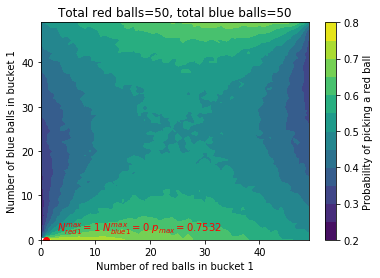

In [82]:

plt.tricontourf(x,y,z, 10) # choose 20 contour levels, just to show how good its interpolation is

MaxProb=Probabilities[np.argmax(Probabilities[:,2]),:]
# point.plot(x=MaxProb[0], y=MaxProb[1], label='point')
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim(0,nRedTot-1)
plt.ylim(0,nBlueTot-1)

plt.xlabel('Number of red balls in bucket 1')
plt.ylabel('Number of blue balls in bucket 1')
plt.title('Total red balls='+str(nRedTot)+', total blue balls='+str(nBlueTot))
cbar = plt.colorbar()
cbar.set_label('Probability of picking a red ball')
plt.text(MaxProb[0]+2,MaxProb[1]+2,'$N_{red 1}^{max}=$'+str(int(MaxProb[0]))+' $N_{blue 1}^{max}=$'+str(int(MaxProb[1]))+' $p_{max}=$'+str(MaxProb[2]),color='red')

plt.scatter(x=MaxProb[0],y=MaxProb[1],color='red')
plt.show()

In [83]:
# PLOT PROBABILITIES #

NumberOfTests=5000 # FOR GIVEN CONFIGURATION #

nRedTot=25 # TOTAL RED BALLS TO DISTRIBUTE
nBlueTot=25 # TOTAL BLUE BALLS TO DISTRIBUTE

Probabilities=GetFullDistribution(nRedTot,nBlueTot,NumberOfTests) # KEEP TRACK OF PROBABILITIES #

Probabilities=np.array(Probabilities)
x=Probabilities[:,0]
y=Probabilities[:,1]
z=Probabilities[:,2]


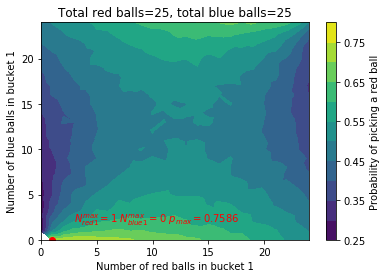

In [84]:

plt.tricontourf(x,y,z, 10) # choose 20 contour levels, just to show how good its interpolation is

MaxProb=Probabilities[np.argmax(Probabilities[:,2]),:]
# point.plot(x=MaxProb[0], y=MaxProb[1], label='point')
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim(0,nRedTot-1)
plt.ylim(0,nBlueTot-1)

plt.xlabel('Number of red balls in bucket 1')
plt.ylabel('Number of blue balls in bucket 1')
plt.title('Total red balls='+str(nRedTot)+', total blue balls='+str(nBlueTot))
cbar = plt.colorbar()
cbar.set_label('Probability of picking a red ball')
plt.text(MaxProb[0]+2,MaxProb[1]+2,'$N_{red 1}^{max}=$'+str(int(MaxProb[0]))+' $N_{blue 1}^{max}=$'+str(int(MaxProb[1]))+' $p_{max}=$'+str(MaxProb[2]),color='red')

plt.scatter(x=MaxProb[0],y=MaxProb[1],color='red')
plt.show()

In [85]:
# PLOT PROBABILITIES #

NumberOfTests=5000 # FOR GIVEN CONFIGURATION #

nRedTot=200 # TOTAL RED BALLS TO DISTRIBUTE
nBlueTot=200 # TOTAL BLUE BALLS TO DISTRIBUTE

Probabilities=GetFullDistribution(nRedTot,nBlueTot,NumberOfTests) # KEEP TRACK OF PROBABILITIES #

Probabilities=np.array(Probabilities)
x=Probabilities[:,0]
y=Probabilities[:,1]
z=Probabilities[:,2]


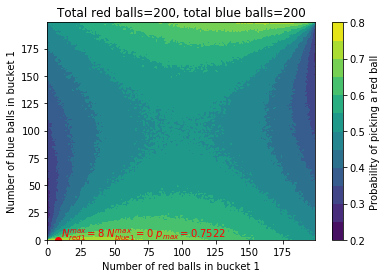

In [86]:

plt.tricontourf(x,y,z, 10) # choose 20 contour levels, just to show how good its interpolation is

MaxProb=Probabilities[np.argmax(Probabilities[:,2]),:]
# point.plot(x=MaxProb[0], y=MaxProb[1], label='point')
# plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlim(0,nRedTot-1)
plt.ylim(0,nBlueTot-1)

plt.xlabel('Number of red balls in bucket 1')
plt.ylabel('Number of blue balls in bucket 1')
plt.title('Total red balls='+str(nRedTot)+', total blue balls='+str(nBlueTot))
cbar = plt.colorbar()
cbar.set_label('Probability of picking a red ball')
plt.text(MaxProb[0]+2,MaxProb[1]+2,'$N_{red 1}^{max}=$'+str(int(MaxProb[0]))+' $N_{blue 1}^{max}=$'+str(int(MaxProb[1]))+' $p_{max}=$'+str(MaxProb[2]),color='red')

plt.scatter(x=MaxProb[0],y=MaxProb[1],color='red')
plt.show()